In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rushi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("C:\\Users\\rushi\\Downloads\\heart_prediction\\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

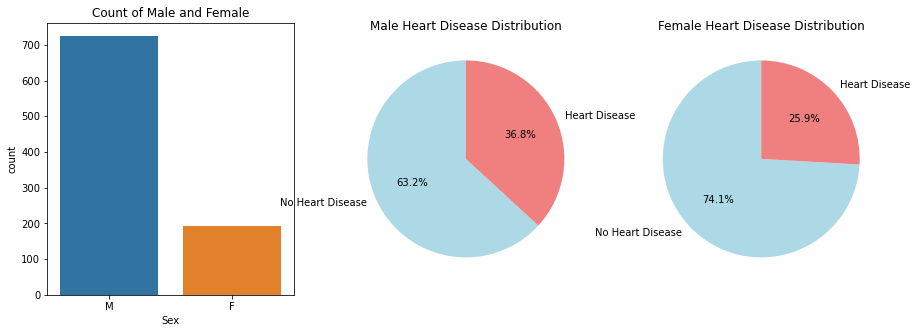

In [7]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Countplot for 'Sex'
sns.countplot(x='Sex', data=df, ax=axes[0])
axes[0].set_title('Count of Male and Female')

# Pie chart for Male
male_data = df[df['Sex'] == 'M']['HeartDisease'].value_counts()
axes[1].pie(male_data, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[1].set_title('Male Heart Disease Distribution')

# Pie chart for Female
female_data = df[df['Sex'] == 'F']['HeartDisease'].value_counts()
axes[2].pie(female_data, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[2].set_title('Female Heart Disease Distribution')

# Show the plots
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [9]:
labelencode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
mappings = {}  # Dictionary to store mappings

for column in labelencode:
    encode = LabelEncoder()
    df[column] = encode.fit_transform(df[column])  # Fix: Call fit_transform as a function
    
    print(f'{column} mapping:')
    column_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))
    print(column_mapping)
    mappings[column] = column_mapping


Sex mapping:
{'F': 0, 'M': 1}
ChestPainType mapping:
{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}
RestingECG mapping:
{'LVH': 0, 'Normal': 1, 'ST': 2}
ExerciseAngina mapping:
{'N': 0, 'Y': 1}
ST_Slope mapping:
{'Down': 0, 'Flat': 1, 'Up': 2}


In [10]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


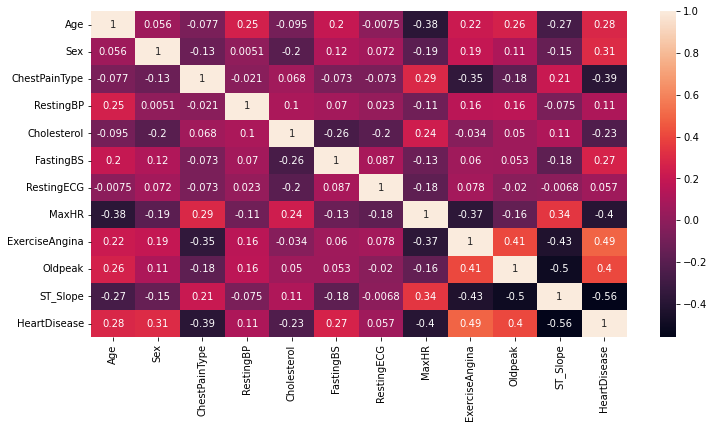

In [11]:
plt.figure(figsize=(12,6))
correlation=df.corr()
sns.heatmap(data=correlation,annot=True,fmt='.2g')
plt.show()

1.MaxHR has a negative correlation (-0.382045) with "HeartDisease." As "MaxHR" decreases, the likelihood of heart disease increases.

2.ExerciseAngina" has a positive correlation (0.494282) with "HeartDisease." The presence of exercise-induced angina is associated with a higher likelihood of heart disease.

3.Oldpeak also has a positive correlation (0.403951) with "HeartDisease.

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [13]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [17]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.8369565217391305

## PCA()

In [49]:
pca = PCA
pca = PCA(n_components=4, whiten=True, svd_solver='randomized', random_state=42)
X_pca=pca.fit_transform(X_scaled)
X_pca.shape

(918, 4)

In [50]:
X_pca

array([[-1.35900958, -0.14025767, -0.41969081, -0.399381  ],
       [-0.68373048, -0.90660511,  1.31608254, -0.39652755],
       [-0.66222876,  0.96402494, -0.79770258, -1.86424925],
       ...,
       [ 1.00007641,  0.07748852, -0.8232477 , -0.24157743],
       [-1.02270061, -1.17812966,  0.59267744,  0.8479922 ],
       [-1.50116813,  0.39221164, -0.10120644,  0.08935899]])

In [51]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.842391304347826

In [52]:
pca.explained_variance_ratio_

array([0.25139665, 0.1330889 , 0.10512913, 0.09088956])

# Pipeline
In machine learning, a pipeline is a sequence of data processing steps that are chained together to streamline and automate the workflow. It typically includes various stages such as data preprocessing, feature engineering, and model training. A pipeline ensures that these steps are executed in a consistent and organized manner, making the code more readable, reproducible, and less prone to errors. The use of pipelines is especially common in frameworks like scikit-learn, where it facilitates the integration of different processing components and models into a unified and efficient workflow.

In [60]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=4)),  # Adjust the number of components as needed
    ('logistic', LogisticRegression(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate on the test set
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy on the test set: {accuracy:.2f}')

Accuracy on the test set: 0.85
